In [1]:
from sklearn.metrics import pairwise_distances
import pickle
from scipy import sparse

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, Normalizer, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sns.set_style("whitegrid")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
nba_stats2021 = pd.read_csv('./nba_stats2021_original.csv')
nba_stats2021.head()

,Player,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,%FTA,%OREB,%REB,%AST,%TOV,%STL,%BLKA,%PF,%PFD,%PTS
0,Stephen Curry,GSW,33,58,32,26,34.1,31.5,10.3,21.3,...,37.9,8.0,17.9,27.6,29.8,20.8,32.5,12.1,32.1,37.1
1,Bradley Beal,WAS,27,57,29,28,35.6,31.1,11.1,22.8,...,37.0,15.9,14.3,22.9,29.6,20.1,26.5,14.3,32.3,34.9
2,Joel Embiid,PHI,27,47,36,11,31.5,29.1,9.2,18.0,...,58.3,43.3,37.2,18.4,34.7,16.1,35.0,21.5,53.0,37.1
3,Luka Doncic,DAL,22,59,35,24,35.1,28.5,10.1,20.8,...,45.4,12.5,25.6,52.4,49.9,21.3,32.2,16.8,38.5,33.7
4,Damian Lillard,POR,30,61,34,27,35.7,28.4,8.8,20.0,...,43.6,6.0,12.8,46.2,36.6,18.0,29.1,11.5,43.1,32.0


In [3]:
# Creating List of offensive stat features
off_stat = []
for feature in nba_stats2021.columns:
    if feature.startswith(('3','2','A','PT','%P','TO','e','PO')):
        off_stat.append(feature)
print(len(off_stat))
off_stat

27


['AGE',
 'PTS',
 '3PM',
 '3PA',
 '3P%',
 'AST',
 'TOV',
 'AST%',
 'AST/TO',
 'AST\xa0Ratio',
 'TO\xa0Ratio',
 'eFG%',
 'POSS',
 '%PTS2PT',
 '%PTS2PT\xa0MR',
 '%PTS3PT',
 '%PTSFBPs',
 '%PTSFT',
 '%PTSOffTO',
 '%PTSPITP',
 '2FGM%AST',
 '2FGM%UAST',
 '3FGM%AST',
 '3FGM%UAST',
 '%PF',
 '%PFD',
 '%PTS']

## ```Defining Clusters in Models offensive Stats```
---

Parameters and Scalers are form the KMean Notebook.

In [4]:
X = nba_stats2021[off_stat]
y = nba_stats2021['Player']

nn = Normalizer()
X_nn = nn.fit_transform(X)

#creating clusters
off = KMeans(n_clusters = 4 ,random_state = 42)
off.fit(X_nn)
y_kmeans = off.predict(X_nn)
nba_stats2021['off_kmean'] = off.labels_
off_sil = silhouette_score(X_nn, off.labels_)
print(silhouette_score(X_nn, off.labels_))

off_cluster0 = nba_stats2021[nba_stats2021['off_kmean']==0]
off_cluster1 = nba_stats2021[nba_stats2021['off_kmean']==1]
off_cluster2 = nba_stats2021[nba_stats2021['off_kmean']==2]
off_cluster3 = nba_stats2021[nba_stats2021['off_kmean']==3]

0.7300294465924135


In [38]:
off_cluster0

,Player,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,%OREB,%REB,%AST,%TOV,%STL,%BLKA,%PF,%PFD,%PTS,off_kmean
509,Anderson Varejao,CLE,38,1,0,1,6.6,1.0,0.0,4.0,...,100.0,66.7,33.3,0.0,0.0,100.0,33.3,33.3,7.7,0
524,Jared Harper,NYK,23,7,5,2,2.1,0.4,0.0,0.6,...,0.0,5.9,16.7,66.7,0.0,0.0,20.0,20.0,9.1,0
528,Anzejs Pasecniks,WAS,25,1,1,0,6.3,0.0,0.0,1.0,...,50.0,20.0,33.3,100.0,0.0,0.0,50.0,0.0,0.0,0
529,Ashton Hagans,MIN,21,2,0,2,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0
530,Greg Whittington,DEN,28,4,3,1,3.0,0.0,0.0,0.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
531,Louis King,SAC,22,1,1,0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
532,Noah Vonleh,BKN,25,4,3,1,2.7,0.0,0.0,0.8,...,0.0,16.7,20.0,33.3,0.0,50.0,33.3,0.0,0.0,0
533,Will Magnay,NOP,22,1,1,0,3.3,0.0,0.0,1.0,...,0.0,0.0,0.0,25.0,0.0,0.0,50.0,0.0,0.0,0


In [40]:
off_cluster1.sort_values(by='%PTS', ascending=False).head()

,Player,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,%OREB,%REB,%AST,%TOV,%STL,%BLKA,%PF,%PFD,%PTS,off_kmean
0,Stephen Curry,GSW,33,58,32,26,34.1,31.5,10.3,21.3,...,8.0,17.9,27.6,29.8,20.8,32.5,12.1,32.1,37.1,1
2,Joel Embiid,PHI,27,47,36,11,31.5,29.1,9.2,18.0,...,43.3,37.2,18.4,34.7,16.1,35.0,21.5,53.0,37.1,1
1,Bradley Beal,WAS,27,57,29,28,35.6,31.1,11.1,22.8,...,15.9,14.3,22.9,29.6,20.1,26.5,14.3,32.3,34.9,1
5,Giannis Antetokounmpo,MIL,26,56,36,20,33.1,28.4,10.3,18.3,...,24.9,33.5,33.2,37.3,21.1,35.1,23.3,55.8,34.0,1
3,Luka Doncic,DAL,22,59,35,24,35.1,28.5,10.1,20.8,...,12.5,25.6,52.4,49.9,21.3,32.2,16.8,38.5,33.7,1


In [43]:
off_cluster2.sort_values(by='PTS', ascending=False).head()

,Player,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,%OREB,%REB,%AST,%TOV,%STL,%BLKA,%PF,%PFD,%PTS,off_kmean
102,Jaren Jackson Jr.,MEM,21,6,1,5,21.5,13.8,4.7,10.7,...,25.9,28.0,8.1,18.2,9.1,33.3,34.8,37.9,26.9,2
200,Gabriel Deck,OKC,26,4,0,4,18.3,9.3,3.5,7.5,...,37.5,28.4,25.6,9.1,25.0,9.1,13.8,18.8,22.6,2
247,Isaiah Thomas,NOP,32,3,1,2,16.1,7.7,3.0,9.0,...,6.3,8.7,19.2,31.6,12.5,20.0,21.4,17.6,20.5,2
257,Henry Ellenson,TOR,24,2,0,2,19.2,7.5,2.5,7.0,...,30.0,29.3,27.8,0.0,0.0,12.5,46.7,15.8,18.3,2
283,Mike James,BKN,30,7,4,3,16.1,6.7,2.4,6.1,...,12.0,10.3,35.7,42.9,9.1,20.0,7.7,23.4,17.3,2


In [44]:
off_cluster2['%PF'].mean()

26.64313725490196

In [48]:
off_cluster3.sort_values(by='PTS', ascending=False).head()

,Player,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,%OREB,%REB,%AST,%TOV,%STL,%BLKA,%PF,%PFD,%PTS,off_kmean
81,T.J. Warren,IND,27,4,3,1,29.3,15.5,6.8,12.8,...,11.1,14.0,7.6,12.9,9.5,12.5,28.6,27.3,22.5,3
232,Dewayne Dedmon,MIA,31,11,7,4,13.2,8.1,3.2,4.3,...,59.0,44.8,9.1,32.1,31.8,22.2,35.1,28.8,24.9,3
389,Jabari Parker,BOS,26,10,3,7,11.1,4.1,1.9,3.5,...,30.8,27.5,13.5,22.2,6.3,0.0,29.0,11.1,17.2,3
407,Thon Maker,CLE,24,8,3,5,9.6,3.8,1.3,2.3,...,38.1,24.7,13.8,15.0,22.2,8.3,33.3,25.0,21.0,3
423,Donta Hall,ORL,23,8,3,5,11.5,3.1,1.1,1.8,...,66.7,41.7,21.2,15.0,25.0,0.0,25.0,23.7,13.5,3


In [46]:
off_cluster3['2FGM%AST'].mean()

51.261538461538464

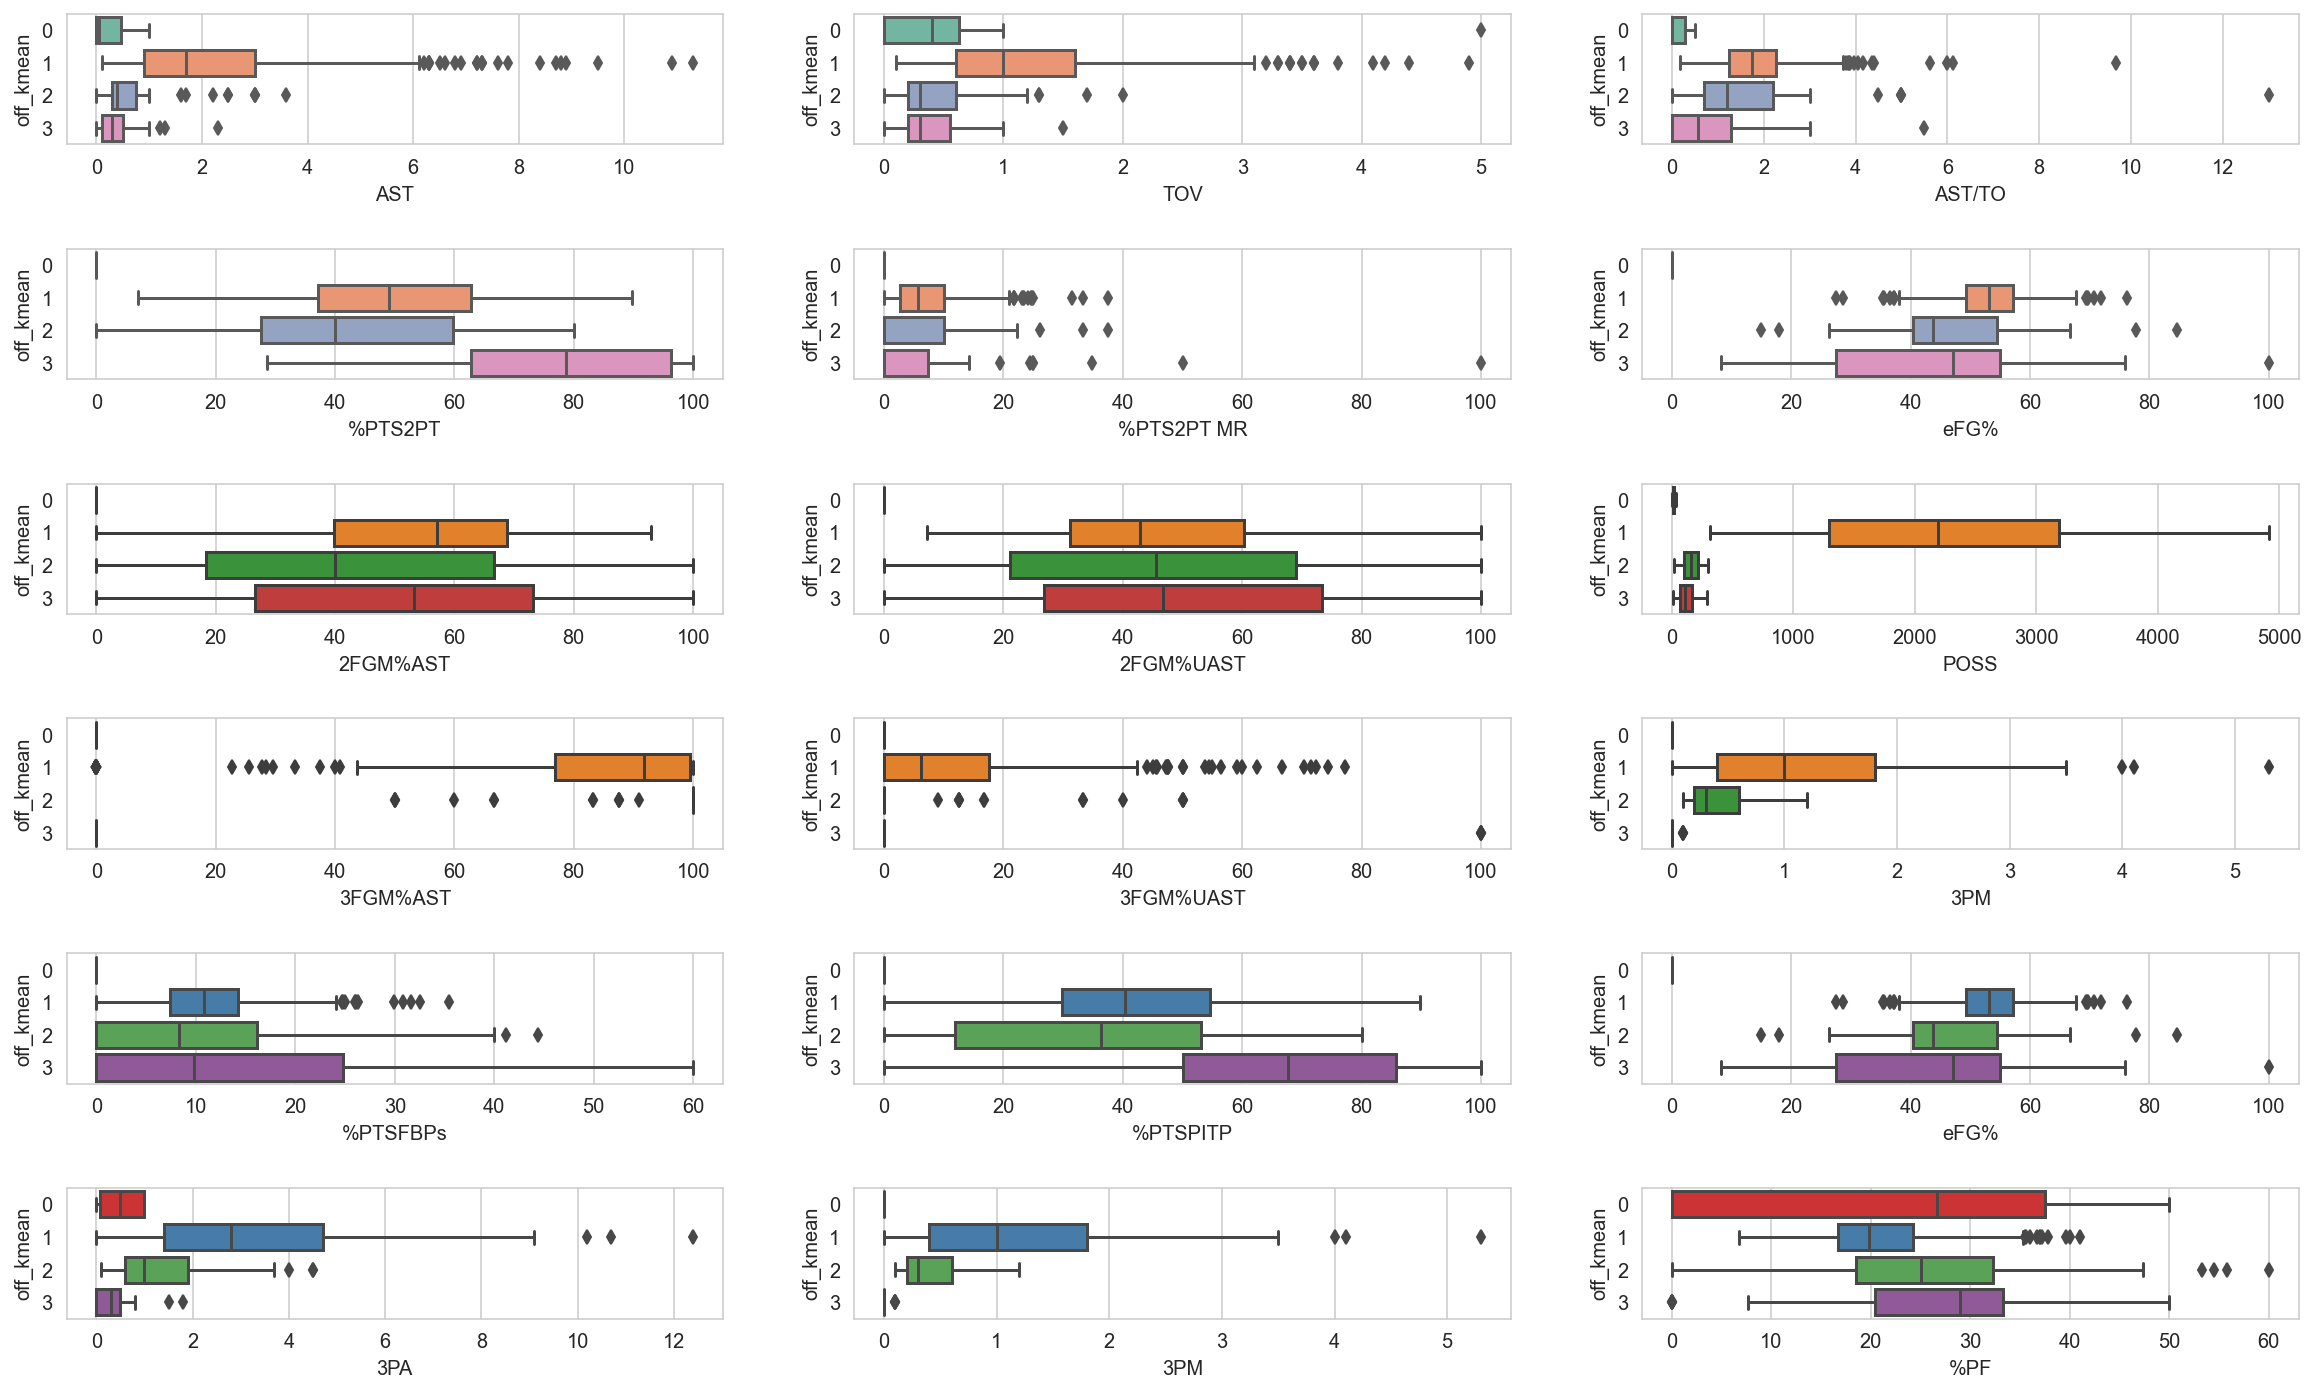

In [41]:

fig, axes = plt.subplots(6, 3, figsize = (20, 12))
plt.subplots_adjust(hspace = 0.8)

# How well a player distributes the ball
sns.boxplot(x = 'AST', y = 'off_kmean', data = nba_stats2021, orient="h", palette="Set2", ax = axes[0,0])
sns.boxplot(x = 'TOV', y = 'off_kmean', data = nba_stats2021, orient="h", palette="Set2", ax = axes[0,1])
sns.boxplot(x = 'AST/TO', y = 'off_kmean', data = nba_stats2021, orient="h", palette="Set2", ax = axes[0,2])
#---------------------- line 2
# How well a player scores 2 pointers
sns.boxplot(x = '%PTS2PT', y = 'off_kmean', data = nba_stats2021, orient="h", palette="Set2", ax = axes[1,0])
sns.boxplot(x = '%PTS2PT\xa0MR', y = 'off_kmean', data = nba_stats2021, orient="h", palette="Set2", ax = axes[1,1])
sns.boxplot(x = 'eFG%', y = 'off_kmean', data = nba_stats2021, orient="h", palette="Set2", ax = axes[1,2])
#---------------------- LINE 3
# How well a player scores 2 pointers off passes
sns.boxplot(x = '2FGM%AST', y = 'off_kmean', data = nba_stats2021, orient="h", ax = axes[2,0])
sns.boxplot(x = '2FGM%UAST', y = 'off_kmean', data = nba_stats2021, orient="h", ax = axes[2,1])
sns.boxplot(x = 'POSS', y = 'off_kmean', data = nba_stats2021, orient="h", ax = axes[2,2])
#---------------------- LINE 4
# How well a player scores 3 pointers off passes
sns.boxplot(x = '3FGM%AST', y = 'off_kmean', data = nba_stats2021, orient="h", ax = axes[3,0])
sns.boxplot(x = '3FGM%UAST', y = 'off_kmean', data = nba_stats2021, orient="h", ax = axes[3,1])
sns.boxplot(x = '3PM', y = 'off_kmean', data = nba_stats2021, orient="h", ax = axes[3,2])
#---------------------- LINE 5
# How well a player scores in general
sns.boxplot(x = '%PTSFBPs', y = 'off_kmean', data = nba_stats2021, orient="h", palette="Set1", ax = axes[4,0])
sns.boxplot(x = '%PTSPITP', y = 'off_kmean', data = nba_stats2021, orient="h", palette="Set1", ax = axes[4,1])
sns.boxplot(x = 'eFG%', y = 'off_kmean', data = nba_stats2021, orient="h", palette="Set1", ax = axes[4,2])
#---------------------- LINE 6
# How well a player scores 3 pointers
sns.boxplot(x = '3PA', y = 'off_kmean', data = nba_stats2021, orient="h", palette="Set1", ax = axes[5,0])
sns.boxplot(x = '3PM', y = 'off_kmean', data = nba_stats2021, orient="h", palette="Set1", ax = axes[5,1])
sns.boxplot(x = '%PF', y = 'off_kmean', data = nba_stats2021, orient="h", palette="Set1", ax = axes[5,2]);

## ```Recommender Dataframes```
---

In [6]:
from sklearn.metrics import pairwise_distances
import pickle
from scipy import sparse

In [7]:
# Creating Pivot table
off_piv = pd.pivot_table(nba_stats2021[off_stat], index = nba_stats2021['Player'])

# Create sparse matrix
off_sparse = sparse.csr_matrix(off_piv.fillna(0))

# Calculating Cosine similarity
off_recommend = pairwise_distances(off_sparse, metric='cosine')

# Creating Recommender Dataframe
off_rec_df = pd.DataFrame(off_recommend, columns=off_piv.index, index = off_piv.index)

In [15]:
pickle.dump(off_rec_df, open('pickle models/off_k_stat.p', 'wb'))

In [19]:
players = off_rec_df['Anthony Edwards'].sort_values()[1:4].index
players

Index(['Andrew Wiggins', 'Khris Middleton', 'Jayson Tatum'], dtype='object', name='Player')

## ```Modern Player Reclassification```
---

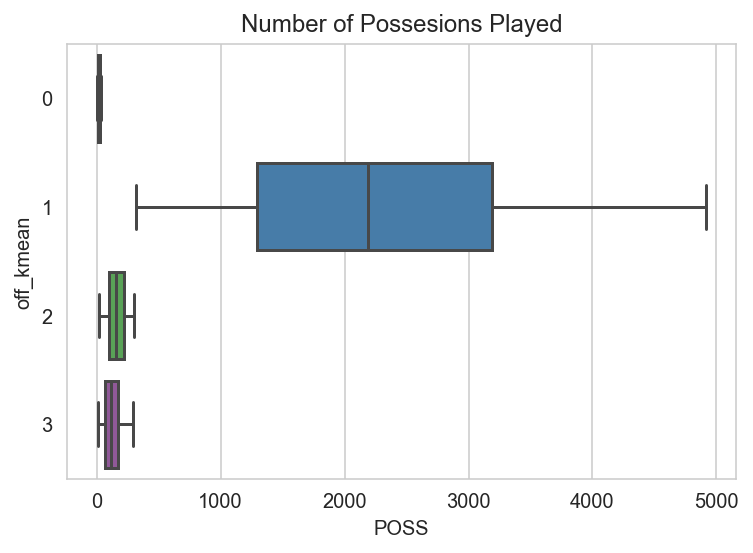

In [54]:
plt.title('Number of Possesions Played')
sns.boxplot(x = 'POSS', y = 'off_kmean', data = nba_stats2021, orient="h", palette="Set1");

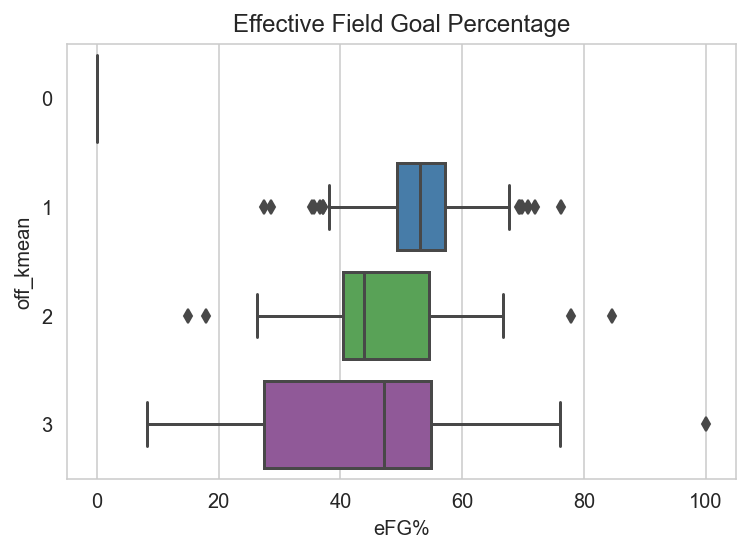

In [57]:
plt.title('Effective Field Goal Percentage')
sns.boxplot(x = 'eFG%', y = 'off_kmean', data = nba_stats2021, orient="h", palette="Set1");

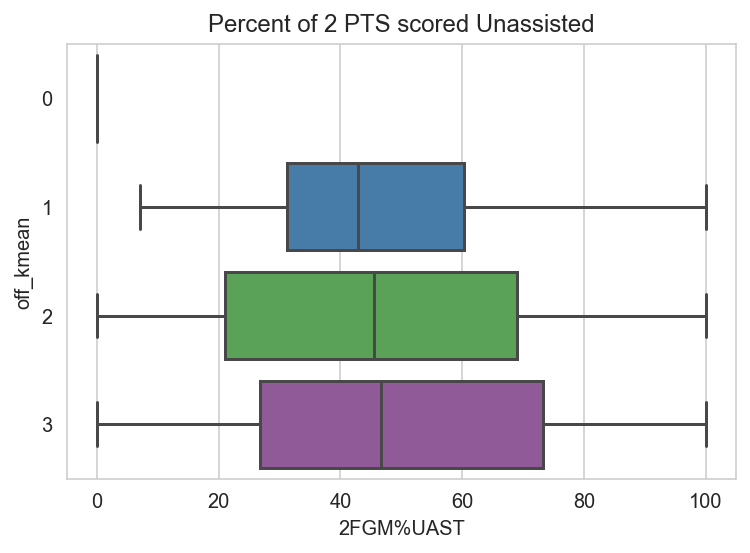

In [60]:
plt.title('Percent of 2 PTS scored Unassisted')
sns.boxplot(x = '2FGM%UAST', y = 'off_kmean', data = nba_stats2021, orient="h", palette="Set1");